In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df_task1 = pd.read_excel("HFE.xlsx", sheet_name = 2)
df_task2 = pd.read_excel("HFE.xlsx", sheet_name = 4)

In [130]:
df_task2

,Subject,Task,Level,Lines:,Mental Demand,Physical Demand,Time Pressure,Successful,Hardness,Discourage,Total Questions:,Average Accuracy,score
0,1,2,5,47,3,1,4,8,4,1,6,1.00,7340
1,2,2,1,2,7,1,2,1,5,9,3,0.33,80
2,3,2,2,17,5,1,5,4,6,5,5,0.75,4712
3,4,2,4,30,7,1,2,1,5,9,3,NaN,2540
4,5,2,1,7,5,1,5,4,6,5,5,NaN,80


In [166]:
df_task1[['Task','Subject']] = df_task1[['Task','Subject']].astype(object)
df_task1.describe()

,Level,Line,Mental Demand,Physical Demand,Time Pressure,Successful,Hardness,Discourage,Average Accuracy,score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.800000,11.600000,9.600000,1.600000,9.400000,3.000000,6.200000,6.800000,0.596091,1083.000000
std,1.095445,7.893035,0.547723,0.547723,0.547723,1.870829,2.167948,0.447214,0.196461,915.461632
min,1.000000,3.000000,9.000000,1.000000,9.000000,1.000000,4.000000,6.000000,0.250000,60.000000
25%,1.000000,8.000000,9.000000,1.000000,9.000000,1.000000,4.000000,7.000000,0.650000,120.000000
50%,1.000000,8.000000,10.000000,2.000000,9.000000,4.000000,7.000000,7.000000,0.670000,1625.000000
75%,3.000000,16.000000,10.000000,2.000000,10.000000,4.000000,7.000000,7.000000,0.670455,1660.000000
max,3.000000,23.000000,10.000000,2.000000,10.000000,5.000000,9.000000,7.000000,0.740000,1950.000000


In [167]:
df_task2[['Task','Subject']] = df_task2[['Task','Subject']].astype(object)
df_task2.describe()

,Level,Lines:,Mental Demand,Physical Demand,Time Pressure,Successful,Hardness,Discourage,Total Questions:,Average Accuracy,score
count,5.00000,5.000000,5.00000,5.0,5.000000,5.000000,5.00000,5.00000,5.000000,3.000000,5.000000
mean,2.60000,20.600000,5.40000,1.0,3.600000,3.600000,5.20000,5.80000,4.400000,0.693333,2950.400000
std,1.81659,18.229098,1.67332,0.0,1.516575,2.880972,0.83666,3.34664,1.341641,0.338575,3123.245235
min,1.00000,2.000000,3.00000,1.0,2.000000,1.000000,4.00000,1.00000,3.000000,0.330000,80.000000
25%,1.00000,7.000000,5.00000,1.0,2.000000,1.000000,5.00000,5.00000,3.000000,0.540000,80.000000
50%,2.00000,17.000000,5.00000,1.0,4.000000,4.000000,5.00000,5.00000,5.000000,0.750000,2540.000000
75%,4.00000,30.000000,7.00000,1.0,5.000000,4.000000,6.00000,9.00000,5.000000,0.875000,4712.000000
max,5.00000,47.000000,7.00000,1.0,5.000000,8.000000,6.00000,9.00000,6.000000,1.000000,7340.000000


$H_{0}$ : $P_{Task_1}$ - $P_{Task_2}$  >=  0 <br>
$H_{1}$ : $P_{Task_1}$ - $P_{Task_2}$  <   0

Null Hypothesis:        Task_1 performance (mean of highest score) is equal or less than Task_2 performance.<br>
Alternative Hypothesis: Task_1 performance (mean of highest score) is less than Task_2 performance.

Since the sample is too small we can try to use bootstrap technique. 

In [168]:
df_task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
Subject              5 non-null object
Task                 5 non-null object
Level                5 non-null int64
Lines:               5 non-null int64
Mental Demand        5 non-null int64
Physical Demand      5 non-null int64
Time Pressure        5 non-null int64
Successful           5 non-null int64
Hardness             5 non-null int64
Discourage           5 non-null int64
Total Questions:     5 non-null int64
Average Accuracy     3 non-null float64
score                5 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 600.0+ bytes


In [169]:
diff_mean = []
for _ in range(1000):
    bootsample1 = df_task1.sample(4, replace =True)
    bootsample2 = df_task2.sample(4, replace =True)
    diff_mean.append(bootsample1['score'].mean() - bootsample2['score'].mean())   

In [170]:
diff_mean

[-2482.5,
 940.0,
 -380.5,
 -3263.5,
 22.0,
 -1305.5,
 -129.25,
 -1643.75,
 -3377.5,
 -3944.75,
 -3843.75,
 237.5,
 -1556.25,
 -3529.25,
 -1186.25,
 -2063.5,
 -4193.0,
 -1433.5,
 177.5,
 -1329.25,
 77.0,
 -2443.75,
 -2063.5,
 -2005.0,
 -3905.5,
 -3828.75,
 -290.5,
 -3213.75,
 -218.0,
 -2013.75,
 -2177.5,
 -1810.5,
 -962.5,
 -2248.0,
 -1138.5,
 -713.75,
 -1457.25,
 -978.0,
 -2195.5,
 -2762.5,
 -1090.0,
 -1871.75,
 -956.25,
 -1768.0,
 -1433.0,
 -3368.5,
 -1265.5,
 -527.25,
 -3878.5,
 549.5,
 -220.0,
 -4135.5,
 -1805.0,
 -437.5,
 -2353.0,
 -3820.0,
 -2090.0,
 -2114.25,
 19.5,
 -875.0,
 -777.5,
 -3186.75,
 -4378.0,
 -205.0,
 -1601.75,
 -2799.75,
 -4401.75,
 -875.0,
 1186.25,
 -2401.75,
 -2443.75,
 -1223.5,
 -1616.75,
 -771.75,
 -4159.25,
 -2814.75,
 -2458.75,
 -1329.25,
 -2786.75,
 556.25,
 -2887.25,
 -2048.0,
 -2201.75,
 243.75,
 -1386.75,
 -2675.0,
 -971.25,
 -722.5,
 -1729.25,
 -305.5,
 -2320.25,
 -1020.0,
 -2578.0,
 -4550.5,
 -3263.5,
 -3296.5,
 -180.0,
 -137.5,
 -3058.75,
 -243.75,
 -

Text(0, 0.5, 'Count ')

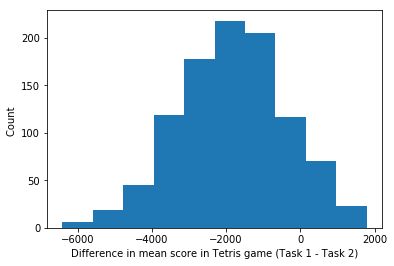

In [182]:
plt.hist(diff_mean);
plt.xlabel('Difference in mean score in Tetris game (Task 1 - Task 2)')
plt.ylabel('Count ')

In [159]:
std = np.std(diff_mean)

In [186]:
diff_mean = pd.Series(diff_mean)

In [188]:
diff_mean.mean()/std

-1.072045327370766

In [173]:
actual_difference = df_task1.score.mean() - df_task2.score.mean()
actual_difference

-1867.4

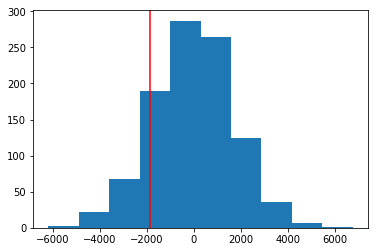

In [178]:
null_vals = np.random.normal(0, std, 1000)
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(actual_difference, c='red')

In [179]:
(null_vals - actual_difference < 0).mean()

0.127

In [176]:
(bootsample1.mean()-bootsample2.mean()< 0).mean()

0.35714285714285715

As P- value > Type-I-Error-Rate of 0.05; we fail to reject null hypothesis. 